
**MO432A - Aprendizado supervisionado**

**Equipe:**

*   Maria Fernanda Tejada Begazo - RA 197488
*   Jose Italo da Costa Silva - RA 265682
*   Gian Franco Joel Condori Luna - RA 234826

**Tarefa 01**

A tarefa foi desenvolvida na linguagem python. Para isso utilizou-se notebooks jupyter no ambiente Google Colaboratory (Google Colab).


In [ ]:
#Primeiro faz-se os imports necessários:
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import pandas as pd
import cv2
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ler os dados

Os dados correspondente da base de dados "solar-flare.csv". Os quais correspondem as columnas com os siguentes dados:

0. Código da clase (Clase modificada de Zurich) (A,B,C,D,E,F,H)
1. Código para o maior tamanho de spot (X,R,S,A,H,K)
2. Código para distribuição de spot (X,O,I,C)
3. Actividade (1 = reducido, 2 = inalterado)
4. Evolução (1 = decair, 2 = sem crecimento, 3 = crecimento)
5. Código de atividade de flares de 24 horas anteriores (1 = nada tão grande quanto um M1, 2 = um M1, 3 = mais atividade do que um M1)
6. Historicamente complexo (1 = Sim, 2 = Não)
7. A região tornou-se historicamente complexa nesta passagem pelo disco solar (1 = sim, 2 = não)
8. Área (1 = pequena, 2 = larga)
9. Área do maior ponto (1 = <=5, 2 = >5)

De todos esses preditores, três classes de flares são previstas, as quais são representadas nas últimas três colunas.

10. Produção de flares **classe C** por esta região nas 24 horas seguintes (flares comuns); Númerico
11. Produção de flares **classe M** por esta região nas 24 horas seguintes (flares moderadas); Númerico
12. Produção de flares **classe X** por esta região nas 24 horas seguintes (flares severos); Númerico

In [ ]:
dataFile = "/content/drive/My Drive/Supervised Learning/solar-flare.csv"
df = pd.read_csv(dataFile, sep=' ', header=None) 

pd.concat([df.head(), df.tail()])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0
1065,B,X,O,1,1,1,1,2,1,1,0,0,0


# Converta os atributos categóricos para numéricos

Nós vamos a usar a regressão lineal pra este trabalho, pelo que devemos converter as $3$ colunas que são atributos categoricos com o método de oneHotEnconder.


In [ ]:
df = pd.get_dummies(df)
df_data2 = df.iloc[:,0:10]
df_data1 = df.iloc[:,10:]
df = pd.concat([df_data1, df_data2], axis=1)
pd.concat([df.head(), df.tail()])

,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,3,1,1,1,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,3,1,1,2,1,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,3,1,1,2,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,2,1,1,1,1,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,2,1,1,0,0,0
1061,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,2,1,1,1,1,1,0,0,0
1062,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,0
1063,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,1,2,2,1,1,0,0,0
1064,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,2,1,1,2,1,1,0,0,0
1065,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,2,1,1,0,0,0


Observação: No PDF não esta saindo o print de todas as colunas, devido a limitação da impresão da tabela. Mas se observa que as colunas originais só eram $13$ e com oneHotEncoder temos $26$ dimensões.

# Centering e Scaling

Faça o centering and standard scaling para todos os atributos de entrada (convertidos para numéricos)

In [ ]:
data = df.to_numpy()
data = df.to_numpy()
X = data[:,0:len(data[0])-3]
Y = data[:,len(data[0])-3:]

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[-0.39994559, -0.49677321, -0.53758383, ..., -2.64859162,
        -0.16120337,  0.        ],
       [-0.39994559, -0.49677321,  1.860175  , ...,  0.37755915,
        -0.16120337,  0.        ],
       [-0.39994559,  2.01299098, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ],
       ...,
       [-0.39994559,  2.01299098, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ],
       [-0.39994559, -0.49677321, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ],
       [ 2.50034011, -0.49677321, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ]])

# PCA

Reduza a dimensionalidade dos atributos de entrada usando PCA.

## Quantas dimensões restarão se mantivermos 90\% da variância dos dados?

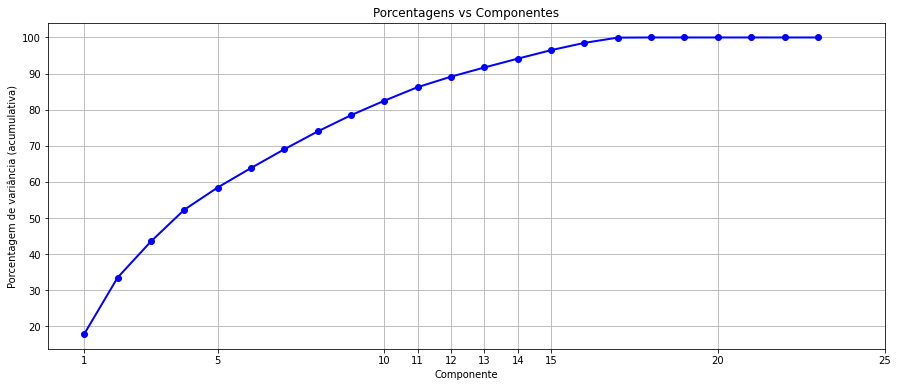

In [ ]:
pca = PCA().fit(X_norm)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_.cumsum()*100, 'bo-', linewidth=2)
plt.title('Porcentagens vs Componentes')
plt.xlabel('Componente')
plt.ylabel('Porcentagem de variância (acumulativa)')
plt.grid("on")
plt.yticks(range(20, 101, 10))
plt.xticks([1, 5, 10, 11, 12, 13, 14, 15, 20, 25])
plt.show()

Pra ter uma variância de $90\%$ preciso de $12$ componentes

## Use o scree plot para determinar quantas dimensões deven ser mantidas

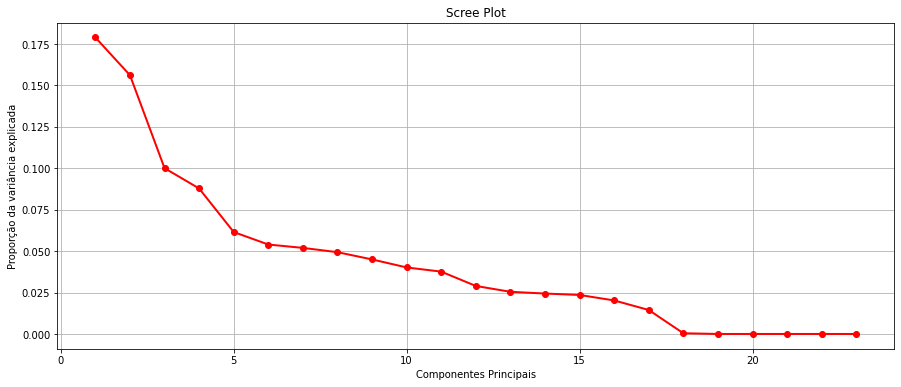

In [ ]:
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da variância explicada')
plt.grid("on")
plt.show()

Estamos vendo na gráfica muitos pontos de corte pra dar um resultado verdadeiro, pelo que se pode fazer segum com o scree plot: $5, 10, 18$

## Converta os dados usando o PCA com $90\%$ de variância

In [ ]:
pca = PCA(n_components=12)
X_normPCA = pca.fit_transform(X_norm)

In [ ]:
print("Dimensões de X: ", len(X_norm[0]))
print("X com PCA (variança de 90): ", len(X_normPCA[0]))

Dimensões de X:  23
X com PCA (variança de 90):  12


# Validação cruzada e regressão linear

Fazendo 5 repetições de uma validação cruzada aleatória com split de 70/30 (70\% treino 30\% teste).

Treine 3 regressões lineares, uma para cada um dos 3 atributos de saída.

Treine no conjunto de treino e meça o RMSE e o MAE deste modelo treinado no conjunto de teste correspondente.

Imprima o RMSE e o MAE no conjunto de testes de cada uma das 5 repetições. Imprima também a média do RMSE e do MAE.

Text(0.5, 1.0, 'SEGUNDA E TERCEIRA REGRESSÃO LINEAR')

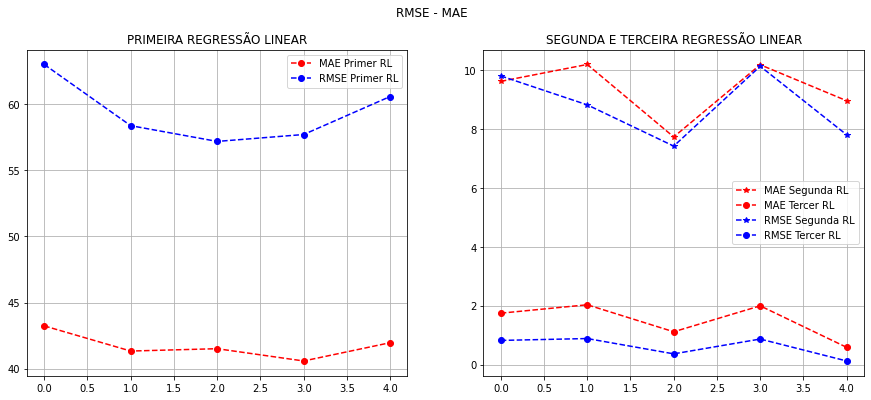

In [ ]:
cv = ShuffleSplit(5,test_size=0.3,random_state=4321)
nmae = [[], [], []]
nrmse = [[], [], []]

p = cv.split(X_normPCA, Y)

for train_index, test_index in p:
  Xtrain, Ytrain = X_normPCA[train_index], Y[train_index]
  Xtest, Ytest = X_normPCA[train_index], Y[train_index]

  md = LinearRegression().fit(Xtrain, Ytrain[:,0])
  Ypredict = md.predict(Xtest)
  nmae[0].append(mean_absolute_error(Ytest[:, 0], Ypredict)) #MAE
  nrmse[0].append(mean_squared_error(Ytest[:, 0], Ypredict)) #RMSE

  md = LinearRegression().fit(Xtrain, Ytrain[:,1])
  Ypredict = md.predict(Xtest)
  nmae[1].append(mean_absolute_error(Ytest[:, 1], Ypredict)) #MAE
  nrmse[1].append(mean_squared_error(Ytest[:, 1], Ypredict)) #RMSE

  md = LinearRegression().fit(Xtrain, Ytrain[:,2])
  Ypredict = md.predict(Xtest)
  nmae[2].append(mean_absolute_error(Ytest[:, 2], Ypredict)) #MAE
  nrmse[2].append(mean_squared_error(Ytest[:, 2], Ypredict)) #RMSE

AVR_MAE = np.round(np.sum(np.array(nmae), axis=1)/len(nmae[0]), 4)
AVR_RMSE = np.round(np.sum(np.array(nrmse), axis=1)/len(nrmse[0]), 4)


plt.rcParams["figure.figsize"] = 15, 6
fig, ax = plt.subplots(ncols=2)
fig.suptitle('RMSE - MAE')
ax[0].plot(range(5), np.array(nmae[0][:])*100, 'ro--', label="MAE Primer RL")
ax[0].plot(range(5), np.array(nrmse[0][:])*100, 'bo--', label="RMSE Primer RL")
ax[0].legend()
ax[0].set_title("PRIMEIRA REGRESSÃO LINEAR")
ax[0].grid()


ax[1].plot(range(5), np.array(nmae[1][:])*100, 'r*--', label="MAE Segunda RL")
ax[1].plot(range(5), np.array(nmae[2][:])*100, 'ro--', label="MAE Tercer RL")
ax[1].plot(range(5), np.array(nrmse[1][:])*100, 'b*--', label="RMSE Segunda RL")
ax[1].plot(range(5), np.array(nrmse[2][:])*100, 'bo--', label="RMSE Tercer RL")
ax[1].legend()
ax[1].grid()
ax[1].set_title("SEGUNDA E TERCEIRA REGRESSÃO LINEAR")


In [ ]:
def func_print(vec1, vec2, avr, avr2, titles_):
  for i in range(len(titles_)):
    print("\n", titles_[i])
    print("MAE: ", np.round(vec1[i][:], 4))
    print("RMSE: ", np.round(vec2[i][:], 4))
    print("AVERAGE MAE: ", avr[i] )
    print("AVERAGE RMSE: ", avr2[i])

In [ ]:
title = ["PRIMEIRA REGRESSÃO LINEAR (CLASSE C)", "SEGUNDA REGRESSÃO LINEAR (CLASSE M)", "TERCEIRA REGRESSÃO LINEAR (CLASSE X)"]
func_print(nmae, nrmse, AVR_MAE, AVR_RMSE, title)

title = ["AVERAGE DAS 3 REGRESSÕES LINEAIS"]
AVR_MAE_T= np.round(np.sum(np.array(nmae), axis=0)/len(nmae), 4)
AVR_RMSE_T= np.round(np.sum(np.array(nrmse), axis=0)/len(nmae), 4)
AVR_MAE_TT= np.round(np.sum(np.array(AVR_MAE_T))/len(nmae[0]), 4)
AVR_RMSE_TT = np.round(np.sum(np.array(AVR_RMSE_T))/len(nrmse[0]), 4)
print("\n", title[0])
print("MAE: ", np.round(AVR_MAE_T, 4))
print("RMSE: ", np.round(AVR_RMSE_T, 4))
print("AVERAGE MAE: ", AVR_MAE_TT)
print("AVERAGE RMSE: ", AVR_RMSE_TT)



 PRIMEIRA REGRESSÃO LINEAR (CLASSE C)
MAE:  [0.4324 0.4134 0.4151 0.4059 0.4197]
RMSE:  [0.6301 0.5838 0.5719 0.5771 0.6058]
AVERAGE MAE:  0.4173
AVERAGE RMSE:  0.5937

 SEGUNDA REGRESSÃO LINEAR (CLASSE M)
MAE:  [0.0962 0.102  0.0774 0.1019 0.0896]
RMSE:  [0.0981 0.0882 0.0742 0.1014 0.0781]
AVERAGE MAE:  0.0934
AVERAGE RMSE:  0.088

 TERCEIRA REGRESSÃO LINEAR (CLASSE X)
MAE:  [0.0175 0.0203 0.0111 0.02   0.0059]
RMSE:  [0.0082 0.0088 0.0036 0.0087 0.0012]
AVERAGE MAE:  0.0149
AVERAGE RMSE:  0.0061

 AVERAGE DAS 3 REGRESSÕES LINEAIS
MAE:  [0.182  0.1786 0.1679 0.1759 0.1717]
RMSE:  [0.2455 0.227  0.2166 0.229  0.2284]
AVERAGE MAE:  0.1752
AVERAGE RMSE:  0.2293
